In [1]:
import sympy as sym

# Symbols
d = sym.Derivative
f = sym.Function
t = sym.symbols("t", constant=False)
pi = sym.symbols("\\pi", constant=True)

sym.init_printing()  # we can use print(latex(...)) to get latex code

# Propeller equations
Following the [Actuator Disk Theory](https://web.mit.edu/16.unified/www/FALL/thermodynamics/notes/node86.html)

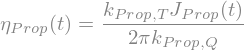

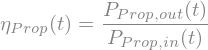

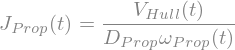

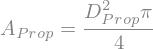

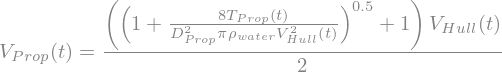

In [2]:
# Functions
prop_pi = f("P_{Prop,in}", real=True)(t)
prop_po = f("P_{Prop,out}", real=True)(t)
prop_Q = f("Q_{Prop}", real=True)(t)
prop_T = f("T_{Prop}", real=True)(t)
prop_w = f("\\omega_{Prop}", real=True)(t)
prop_V = f("V_{Prop}", real=True)(t)
prop_J = f("J_{Prop}", real=True)(t)
prop_eff = f("\\eta_{Prop}", real=True)(t)
hull_V = f("V_{Hull}", real=True)(t)

# Constants
rho, prop_D, prop_A, prop_kT, prop_kQ = sym.symbols(
    "\\rho_{water} D_{Prop} A_{Prop} k_{Prop\,T} k_{Prop\,Q}", real=True, constant=True, positive=True
)

eq_prop_pi = sym.Eq(
    prop_pi, prop_w * prop_Q
)
eq_prop_po = sym.Eq(
    prop_po, prop_V * prop_T
)
eq_prop_eff_1 = sym.Eq(
    prop_eff, (1/(2 * sym.pi)) * (prop_kT / prop_kQ) * prop_J
)
eq_prop_eff_2 = sym.Eq(
    prop_eff, prop_po / prop_pi
)
eq_prop_J = sym.Eq(
    prop_J, hull_V / (prop_w * prop_D)
)
eq_prop_T = sym.Eq(
    prop_T, prop_kT * rho * prop_D**4 * prop_w**2
)
eq_prop_Q = sym.Eq(
    prop_Q, prop_kQ * rho * prop_D**5 * prop_w**2
)
eq_prop_pi2 = sym.Eq(
    prop_pi, 2 * sym.pi * prop_kQ * rho * prop_w**3 * prop_D**5
)
eq_prop_A = sym.Eq(
    prop_A,
    pi * prop_D**2 / 4
)
eq_prop_V = sym.Eq(
    prop_V,
    (hull_V / 2) * (1 + (1 + (prop_T/(prop_A * (rho / 2) * hull_V**2 )))**(1/2) )
).subs({eq_prop_A.lhs: eq_prop_A.rhs})

display(eq_prop_pi, eq_prop_po, eq_prop_eff_1, eq_prop_eff_2, eq_prop_J, eq_prop_T, eq_prop_Q, eq_prop_pi2, eq_prop_A, eq_prop_V)

# Hull equations

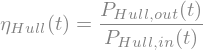

In [3]:
# Functions
# hull_V = f("V_{Hull}")(t) # Already defined
hull_R = f("R_{Hull}")(t)
hull_pi = f("P_{Hull,in}")(t)
hull_po = f("P_{Hull,out}")(t)
hull_eff = f("\\eta_{Hull}", real=True)(t)

# Constants
hull_k, hull_S, hull_C = sym.symbols(
    "k_{Hull} C_{f} S_{w}", real=True, constant=True, positive=True
)

eq_hull_R = sym.Eq(
    hull_R,
    (1/2) * hull_C * rho * hull_S * hull_V**2
)

eq_hull_po = sym.Eq(
    hull_po, hull_R * hull_V
)

eq_hull_eff = sym.Eq(
    hull_eff, hull_po / hull_pi
)

display(eq_hull_R, eq_hull_po, eq_hull_eff)


# Propeller-Hull coupling

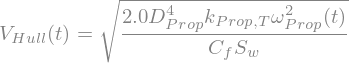

In [4]:
display(eq_hull_R, eq_prop_T)

eq_prop_T2 = sym.Eq(
    prop_T, hull_R
)
display(eq_prop_T2)

eq_hull_prop = eq_hull_R.subs({eq_hull_R.lhs: eq_prop_T.rhs})

# eq_hull_V2 = sym.Eq(
#     hull_V**2,
#     sym.solve(
#         eq_hull_prop,
#         hull_V**2,
#     )[0],
# )
# display(eq_hull_V2)

eq_hull_V = sym.Eq(
    hull_V,
    sym.sqrt(
        sym.solve(
            eq_hull_prop,
            hull_V**2,
        )[0],
        evaluate=False
    ),
)
display(eq_hull_V)

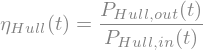

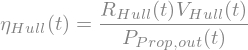

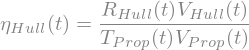

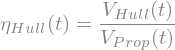

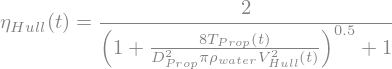

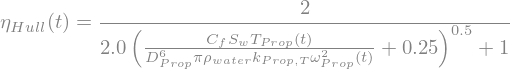

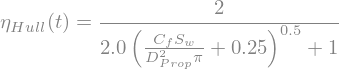

In [5]:
eq_hull_pi = sym.Eq(
    hull_pi, prop_po
)

display(eq_hull_pi)

display(eq_hull_eff)

eq_hull_eff2 = eq_hull_eff.subs({
    eq_hull_po.lhs: eq_hull_po.rhs,
    eq_hull_pi.lhs: eq_hull_pi.rhs,
})

display(eq_hull_eff2)

eq_hull_eff3 = eq_hull_eff2.subs({
    eq_prop_po.lhs: eq_prop_po.rhs,
})

display(eq_hull_eff3)

eq_hull_eff4 = eq_hull_eff3.replace(
    eq_prop_T2.lhs, eq_prop_T2.rhs
)

display(eq_hull_eff4)

# BELOW HERE, IT SEEMS WRONG

eq_hull_eff5 = eq_hull_eff4.replace(
    eq_prop_V.lhs, eq_prop_V.rhs
)

display(eq_hull_eff5)

eq_hull_eff6 = eq_hull_eff5.subs({
    eq_hull_V.lhs: eq_hull_V.rhs
})

display(eq_hull_eff6)

eq_hull_eff7 = eq_hull_eff6.subs({
    eq_prop_T.lhs: eq_prop_T.rhs
})

display(eq_hull_eff7)

# Transmission equations

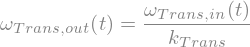

In [6]:
# Functions
trans_Qi = f("Q_{Trans, in}", real=True)(t)
trans_Qo = f("Q_{Trans, out}", real=True)(t)
trans_wi = f("\\omega_{Trans, in}", real=True)(t)
trans_wo = f("\\omega_{Trans, out}", real=True)(t)
trans_pi = f("P_{Trans, in}", real=True)(t)
trans_po = f("P_{Trans, out}", real=True)(t)

# Constants
trans_K, trans_eff = sym.symbols(
    "k_{Trans} \\eta_{Trans}", real=True, constant=True, positive=True
)

eq_trans_pi = sym.Eq(
    trans_pi,
    trans_wi * trans_Qi
)
eq_trans_po = sym.Eq(
    trans_po,
    trans_wo * trans_Qo
)

eq_trans_wo = sym.Eq(
    trans_wo,
    trans_wi / trans_K
)
eq_trans_po2 = sym.Eq(
    trans_po,
    trans_eff * trans_pi
)

display(eq_trans_pi, eq_trans_po, eq_trans_wo, eq_trans_po2)

# Transmission-Propeller coupling

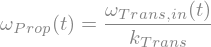

In [7]:
eq_prop_w = sym.Eq(
    prop_w, trans_wo
)
display(eq_prop_w)

eq_prop_pi4 = sym.Eq(
    prop_pi, trans_po
)
display(eq_prop_pi4)

eq_prop_pi4 = eq_prop_pi4.subs({eq_trans_po2.lhs: eq_trans_po2.rhs})
display(eq_prop_pi4)

eq_prop_w = eq_prop_w.subs({eq_trans_wo.lhs: eq_trans_wo.rhs})
display(eq_prop_w)

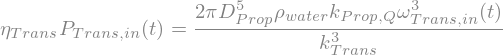

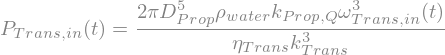

In [8]:
display(eq_prop_pi2)

eq = eq_prop_pi2.subs({
    eq_prop_pi4.lhs: eq_prop_pi4.rhs,
    eq_prop_w.lhs: eq_prop_w.rhs,
})
display(eq)

eq_trans_pi2 = sym.Eq(
    trans_pi,
    sym.solve(eq, trans_pi)[0]
)
display(eq_trans_pi2)

## Motor Equations

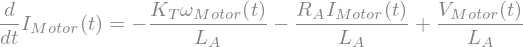

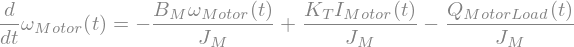

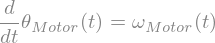

In [9]:
# System Functions
motor_i = f("I_{Motor}", real=True)(t)
motor_v = f("V_{Motor}", real=True)(t)
motor_w = f("\\omega_{Motor}", real=True)(t)
motor_ang = f("\\theta_{Motor}", real=True)(t)
motor_load_Q = f("Q_{Motor Load}", real=True)(t)

# Power Functions
motor_pi = f("P_{Motor,in}", real=True)(t)
motor_po = f("P_{Motor,out}", real=True)(t)
motor_pl = f("P_{Motor,loss}", real=True)(t)
motor_eff = f("\\eta_{Motor}", real=True)(t)

# Constants
R_A, L_A, K_T, K_V, J_M, B_M = sym.symbols(
    "R_A L_A K_T K_V J_M B_M", real=True, constant=True, positive=True
)

# System Equations
eq_motor_didt = sym.Eq(
    d(motor_i, t), -(R_A / L_A) * motor_i - (K_T / L_A) * motor_w + (1 / L_A) * motor_v
)
eq_motor_dwdt = sym.Eq(
    d(motor_w, t), (K_T / J_M) * motor_i - (B_M / J_M) * motor_w - (1 / J_M) * motor_load_Q
)
eq_motor_dangdt = sym.Eq(d(motor_ang, t), motor_w)

# Power Equations
eq_motor_pi = sym.Eq(motor_pi, motor_i * motor_v)
eq_motor_po = sym.Eq(motor_po, motor_w * motor_load_Q)
eq_motor_pl = sym.Eq(motor_pl, R_A * motor_i**2 + B_M * motor_w**2)
eq_motor_po2 = sym.Eq(motor_po, motor_eff * motor_pi)

display(eq_motor_didt, eq_motor_dwdt, eq_motor_dangdt, eq_motor_pi, eq_motor_po, eq_motor_pl, eq_motor_po2)


# Motor-Transmission Coupling

In [10]:
eq_trans_wi = sym.Eq(
    trans_wi, motor_w
)
display(eq_trans_wi)

eq_trans_pi3 = sym.Eq(
    trans_pi, motor_po
)
display(eq_trans_pi3)

eq_trans_qi = sym.Eq(
    trans_Qi, motor_load_Q
)
display(eq_trans_qi)

eq_trans_pi3 = eq_trans_pi3.subs({eq_motor_po2.lhs: eq_motor_po2.rhs})
display(eq_trans_pi3)

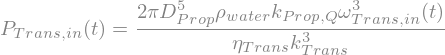

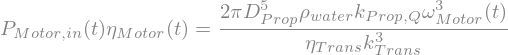

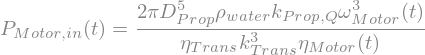

In [11]:
display(eq_trans_pi2)

eq = eq_trans_pi2.subs({
    eq_trans_pi3.lhs: eq_trans_pi3.rhs,
    eq_trans_wi.lhs: eq_trans_wi.rhs,
})
display(eq)

eq_motor_pi2 = sym.Eq(
    motor_pi,
    sym.solve(eq, motor_pi)[0]
)
display(eq_motor_pi2)

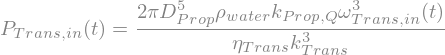

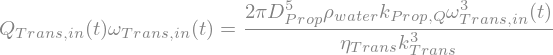

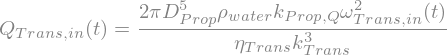

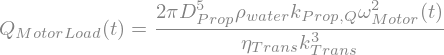

In [12]:
display(eq_trans_pi2)

eq = eq_trans_pi2.subs({
    eq_trans_pi.lhs: eq_trans_pi.rhs
})
display(eq)

eq = sym.Eq(
    trans_Qi,
    sym.solve(eq, trans_Qi)[0]
)
display(eq)

eq_motor_load_Q = eq.subs({
    eq_trans_qi.lhs: eq_trans_qi.rhs,
    eq_trans_wi.lhs: eq_trans_wi.rhs
})
display(eq_motor_load_Q)

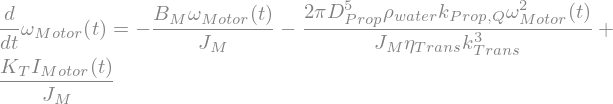

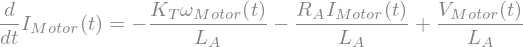

In [13]:
eq_motor_dwdt2 = eq_motor_dwdt.subs({eq_motor_load_Q.lhs: eq_motor_load_Q.rhs}).expand()
display(eq_motor_dwdt2)
eq_motor_didt
display(eq_motor_didt)

# ESC equations

In [14]:
# System Functions
esc_D = f("D_{ESC}", real=True)(t)

# Power Functions
esc_pi = f("P_{ESC,in}", real=True)(t)
esc_po = f("P_{ESC,out}", real=True)(t)
esc_vi = f("V_{ESC,in}", real=True)(t)
esc_vo = f("V_{ESC,out}", real=True)(t)
esc_ii = f("I_{ESC,in}", real=True)(t)
esc_io = f("I_{ESC,out}", real=True)(t)
esc_eff = f("\\eta_{ESC}", real=True)(t)

# System Equations
eq_esc_vo = sym.Eq(esc_vo, esc_vi * esc_D)

# Power Equations
eq_esc_pi = sym.Eq(esc_pi, esc_ii * esc_vi)
eq_esc_po = sym.Eq(esc_po, esc_io * esc_vo)
eq_esc_po2 = sym.Eq(esc_po, esc_eff * esc_pi)

display(eq_esc_vo, eq_esc_pi, eq_esc_po, eq_esc_po2)

# ESC-Motor Coupling

In [15]:
eq_motor_pi3 = sym.Eq(motor_pi, esc_po)
display(eq_motor_pi3)
eq_motor_pi3 = eq_motor_pi3.subs({eq_esc_po2.lhs: eq_esc_po2.rhs})
display(eq_motor_pi3)

eq_motor_v = sym.Eq(motor_v, esc_vo)
display(eq_motor_v)
eq_motor_v = eq_motor_v.subs({eq_esc_vo.lhs: eq_esc_vo.rhs})
display(eq_motor_v)


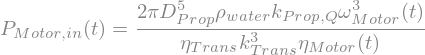

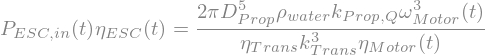

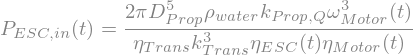

In [16]:
display(eq_motor_pi2)

eq = eq_motor_pi2.subs({
    eq_motor_pi3.lhs: eq_motor_pi3.rhs,
    eq_trans_wi.lhs: eq_trans_wi.rhs,
})
display(eq)

eq_esc_pi2 = sym.Eq(
    esc_pi,
    sym.solve(eq, esc_pi)[0]
)
display(eq_esc_pi2)

# Solving
Now, we just need to solve the motor system for $W_{Motor}$:

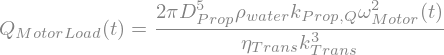

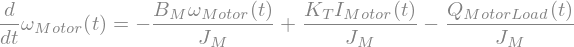

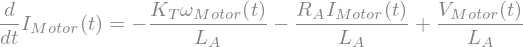

In [17]:
display(eq_motor_load_Q)
display(eq_motor_dwdt)
display(eq_motor_didt)

In [18]:
print(sym.latex(eq_motor_load_Q))
print(sym.latex(eq_motor_dwdt))
print(sym.latex(eq_motor_didt))

Q_{Motor Load}{\left(t \right)} = \frac{2 \pi D_{Prop}^{5} \rho_{water} k_{Prop,Q} \omega_{Motor}^{2}{\left(t \right)}}{\eta_{Trans} k_{Trans}^{3}}
\frac{d}{d t} \omega_{Motor}{\left(t \right)} = - \frac{B_{M} \omega_{Motor}{\left(t \right)}}{J_{M}} + \frac{K_{T} I_{Motor}{\left(t \right)}}{J_{M}} - \frac{Q_{Motor Load}{\left(t \right)}}{J_{M}}
\frac{d}{d t} I_{Motor}{\left(t \right)} = - \frac{K_{T} \omega_{Motor}{\left(t \right)}}{L_{A}} - \frac{R_{A} I_{Motor}{\left(t \right)}}{L_{A}} + \frac{V_{Motor}{\left(t \right)}}{L_{A}}


## Steady-state

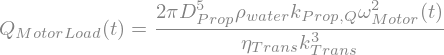

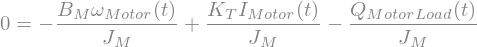

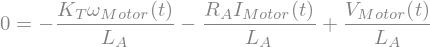

In [19]:
display(eq_motor_load_Q)

eq_motor_dwdt_ss = eq_motor_dwdt.subs({eq_motor_dwdt.lhs: 0})
display(eq_motor_dwdt_ss)

eq_motor_didt_ss = eq_motor_didt.subs({eq_motor_didt.lhs: 0})
display(eq_motor_didt_ss)


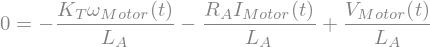

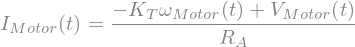

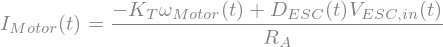

In [20]:
display(eq_motor_didt_ss)

eq_motor_i_ss = sym.Eq(
    motor_i,
    sym.solve(eq_motor_didt_ss, motor_i)[0]
)
display(eq_motor_i_ss)

eq_motor_i_ss = eq_motor_i_ss.subs({eq_motor_v.lhs: eq_motor_v.rhs})
display(eq_motor_i_ss)

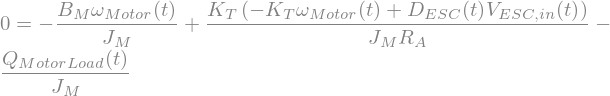

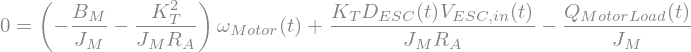

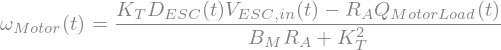

In [21]:
eq = eq_motor_dwdt_ss.subs({
    eq_motor_i_ss.lhs: eq_motor_i_ss.rhs,
})
display(eq)

eq = sym.Eq(
    eq.lhs,
    sym.collect(eq.rhs.expand(), motor_w)
)
display(eq)


eq_motor_w_ss = [
    sym.Eq(
        motor_w,
        res
    ) for res in sym.solve(eq, motor_w)
]
[display(eq) for eq in eq_motor_w_ss]

eq_motor_w_ss = eq_motor_w_ss[0]

### Steady-State equations

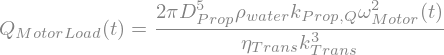

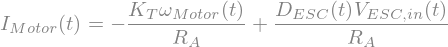

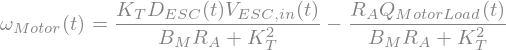

In [22]:
display(eq_motor_load_Q)
display(eq_motor_i_ss.expand())
display(eq_motor_w_ss.expand())

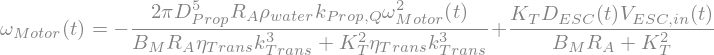

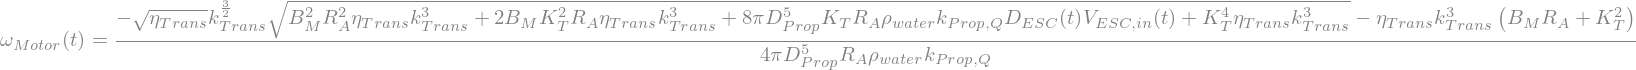

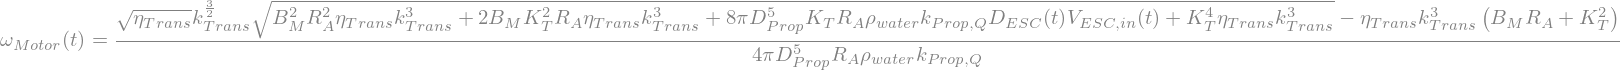

In [23]:
eq = eq_motor_w_ss.subs({eq_motor_load_Q.lhs: eq_motor_load_Q.rhs}).expand()
display(eq)

# This is like x(t) = a*y(t) - b*(x(t))**3, which has exact solutions:
eq_motor_w_ss2 = [
    sym.Eq(
        motor_w,
        res.simplify()
    ) for res in sym.solve(eq, motor_w)
]
[display(eq) for eq in eq_motor_w_ss2]

eq_motor_w_ss2 = eq_motor_w_ss2[1]


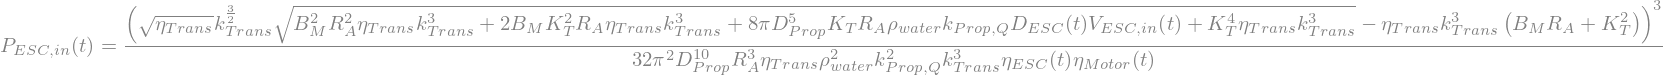

In [24]:
eq_esc_pi3 = eq_esc_pi2.subs({eq_motor_w_ss2.lhs: eq_motor_w_ss2.rhs})
display(eq_esc_pi3)